# Map for LAPS sensitivity manuscript

Author: Johanna L K Wren

Email:  johanna.wren@noaa.gov

Date:   September 16, 2022


## Description
This map shows the release and settlement sites for the LAPS study region.  


In [1]:
import pygmt
import geopandas as gpd
import pandas as pd
#import rasterio as rio
#import rioxarray as rxr
from pathlib import Path
import matplotlib.pyplot as plt

## Read in locations
We have the locations of the science centers, regional offices, and labs in a csv file. Each location is tagged wtih what it is so we can sort on that. 

In [2]:
# Read in CSV file
# Release sites
sitesR = pd.read_csv('LAPS_release_sites_noHI.csv')

# Settlement Sites
sitesS = pd.read_csv('HIreefsNew.csv', header=None)
# Add column headers
sitesS.columns = ['Lat', 'Lon', 'Cover', 'Site']

# Site names
sites = pd.read_csv('LAPS_sites.csv')
sites = sites.drop([7,8,9])

In [3]:
sites.drop([10]).Lon

0     144.80
1     145.75
2     171.20
3     166.81
4     203.50
5     158.24
6     128.06
11    166.65
Name: Lon, dtype: float64

In [4]:
FFS = sitesS.loc[217]
FFS

Lat       23.768426
Lon      193.883406
Cover      0.715500
Site      17.000000
Name: 217, dtype: float64

## Make plot
Using pyGMT here and it's suprisingly easy using shapefiles (converted to gmt) and it plots quick! I'm very impressed with this package. There is good documetation available and it's constantly improving, so an excellent experience so far. The syntax is pretty close to GMT so it's not too difficult to guess how to change the pen, colors etc. 

Makine a Robinson projection (and a Mercator in case) showing the Pacific Ocean. 

Using gray land and light blue ocean. The locaitons have different colors depening on what type it is (release sites, settlement sites, etc.)

Saving as an .eps file so I can add a legend and labels in Illustrator. 

In [5]:
# Define extent of map
laps = [120, 215, 0, 35]

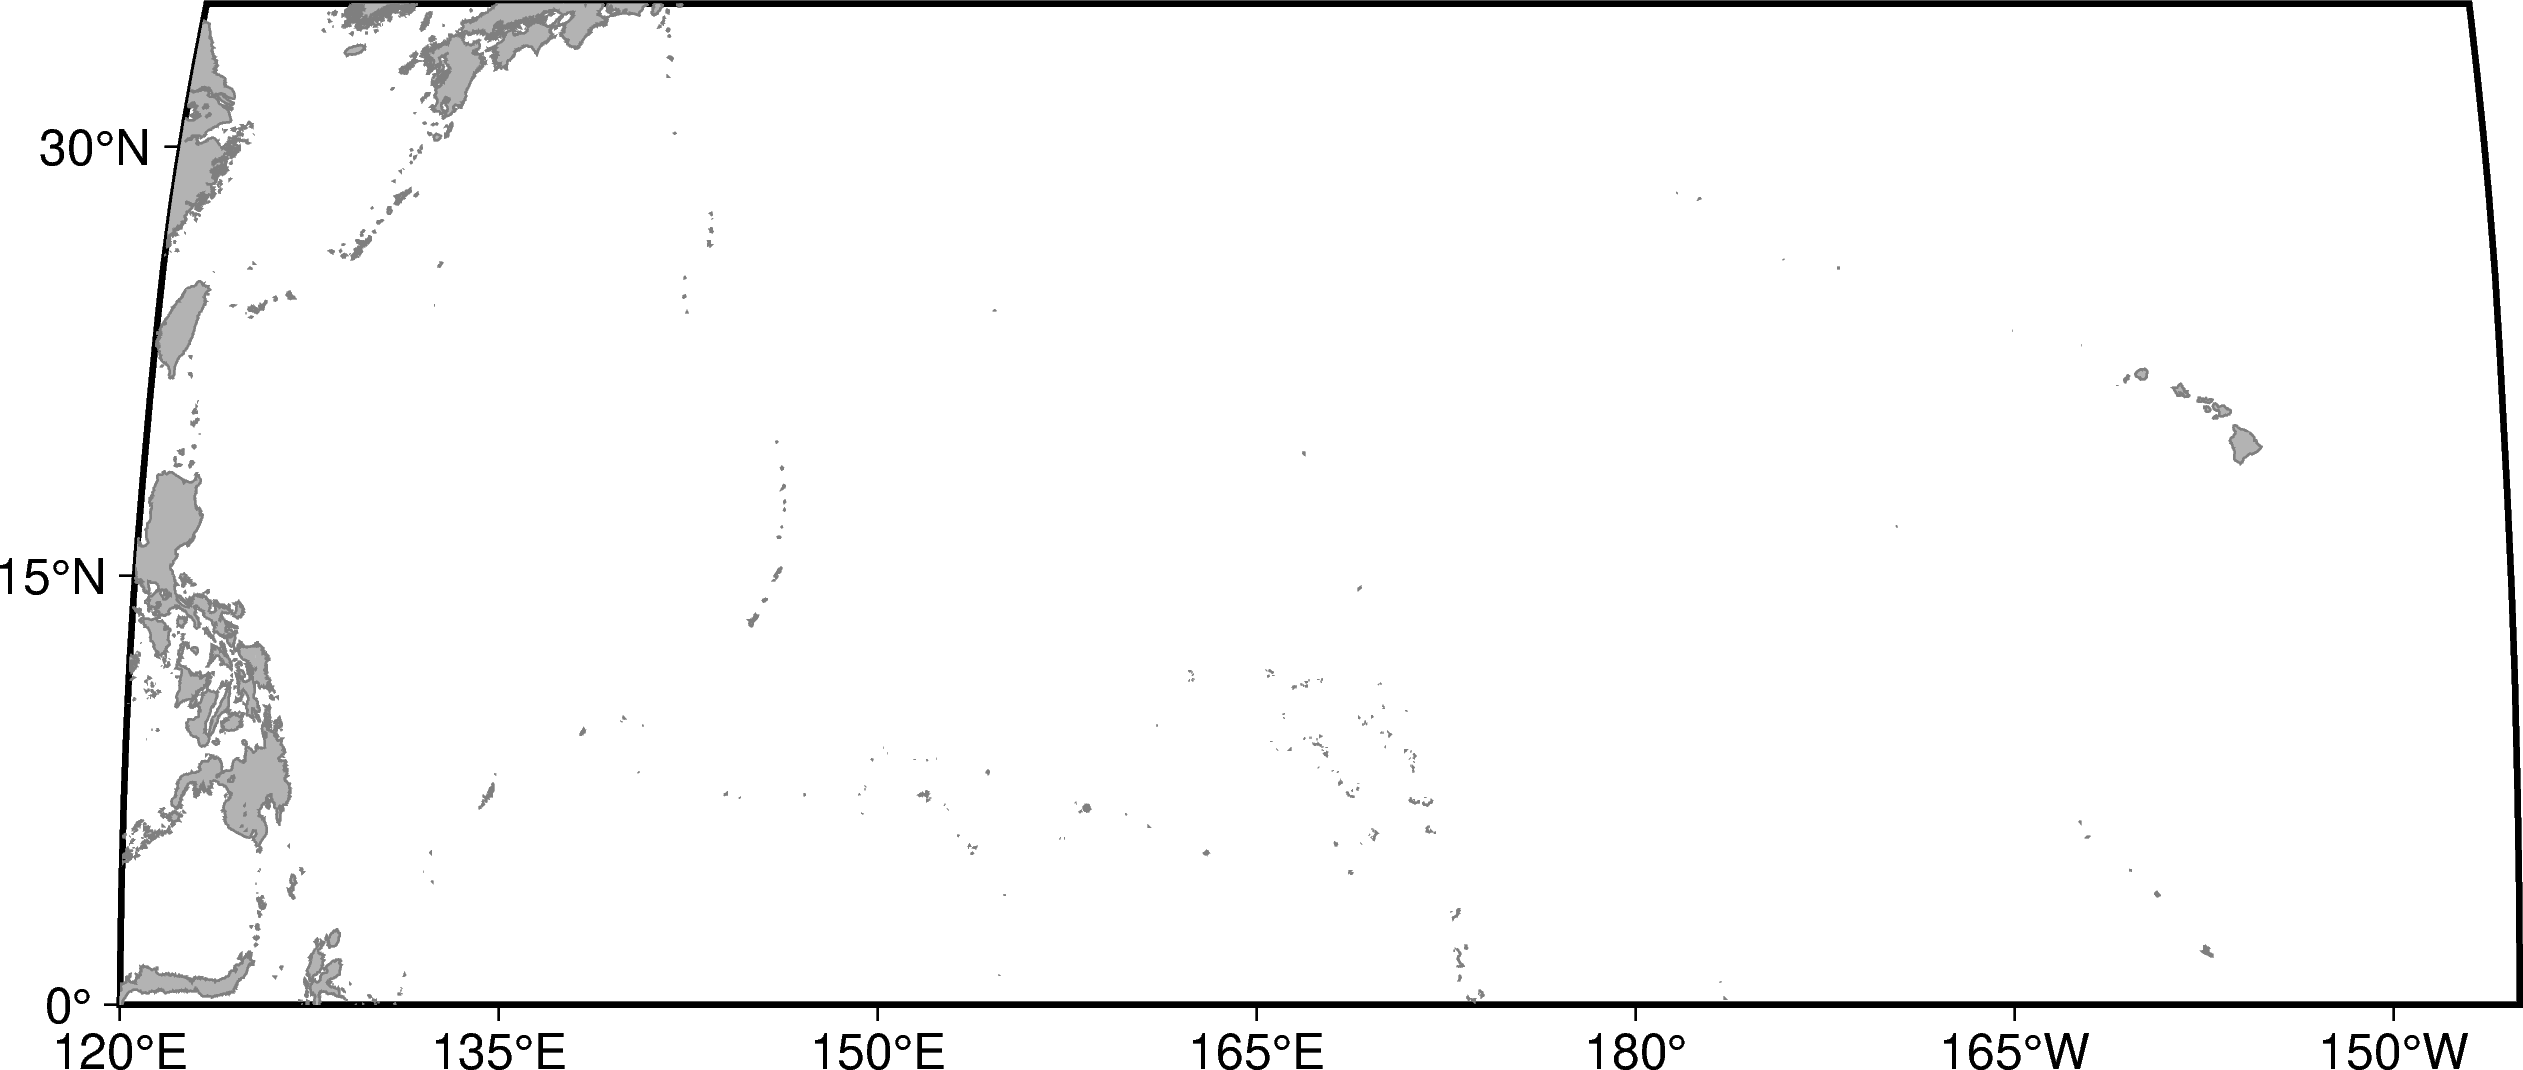

In [12]:
# Make the figure base figure. I went with a Robinson projection here
fig = pygmt.Figure()
with pygmt.config(MAP_FRAME_TYPE="plain", FONT_ANNOT_PRIMARY='12p'):
    fig.basemap(region=laps, projection='N180/8i', frame='a')
# Add coas lines and water color
#fig.coast(region=laps, water='#D3E9F1', d='c')     #D3E9F1 #E0EFF5
fig.coast(region=laps, land='gray70', shorelines="0.5p,gray50", d='c')
# Add blue circles for the RELEASE sites with name labels
fig.plot(x=sitesR.Lon, y=sitesR.Lat, style="c2p", color='#355e8c')
fig.text(text=sites.drop([10]).Name, x=sites.drop([10]).Lon+0.8, y=sites.drop([10]).Lat, justify='ML', font='12p')
## This one does Johnston separate becuse I wanted the label in a different place relative to the coordinate location
fig.text(text=sites.Name[10], x=sites.Lon[10], y=sites.Lat[10]-0.5, justify='TC', font='12p')
# Add green points for NWHI SETTLEMENT sites
fig.plot(x=sitesS[sitesS['Site'] <= 22].Lon, y=sitesS[sitesS['Site'] <= 22].Lat, style="c0.75p", color="#1fa385")
## Add point for French Frigate Shoals
fig.plot(x=FFS.Lon, y=FFS.Lat, style="c2p", color="black")
fig.text(text='Lalo', x=FFS.Lon, y=FFS.Lat-0.75, justify='TC', font='12p,#1fa385')
# Add purple points for MHI SETTLEMENT sites
fig.plot(x=sitesS[sitesS['Site'] > 23].Lon, y=sitesS[sitesS['Site'] > 23].Lat, style="c0.75p", color="mediumvioletred")
# Add line and label for NWHI
fig.plot(x=[200.5, 207.16], y=[23.5, 20], pen='1p')
fig.text(text=['Northwestern', 'Hawaiian Islands'], x=[192, 192], y=[30.5, 28.5], justify='MC', angle=340, font='12p,#1fa385')
# Add line and label for MHI
fig.plot(x=[181.15, 199.9], y=[30.14, 23.8], pen='1p')
fig.text(text=['Main Hawaiian', 'Islands'], x=[202.5, 202.5], y=[26.5, 24.5], justify='ML', angle=331, font='12p,mediumvioletred')

# Finish up the plot
fig.set_panel()

# Show the figure below
fig.show()

# Save the figure
fig.savefig('LAPS_study_area.eps')

In [5]:
islands = pd.read_csv('LAPS_release_sites_short.csv')
islands


,Name,Lon,Lat
0,Guam,144.80,13.460
1,Saipan,145.75,15.180
2,Majuro,171.20,7.110
3,Rongelap,166.81,11.345
4,Kiritimati,202.80,2.000
5,Pohnpei,158.24,6.875
6,Okinawa,128.06,26.520
7,Oahu,202.10,21.430
8,Hawaii,204.40,19.475
9,French Frigate Shoals,193.85,23.750


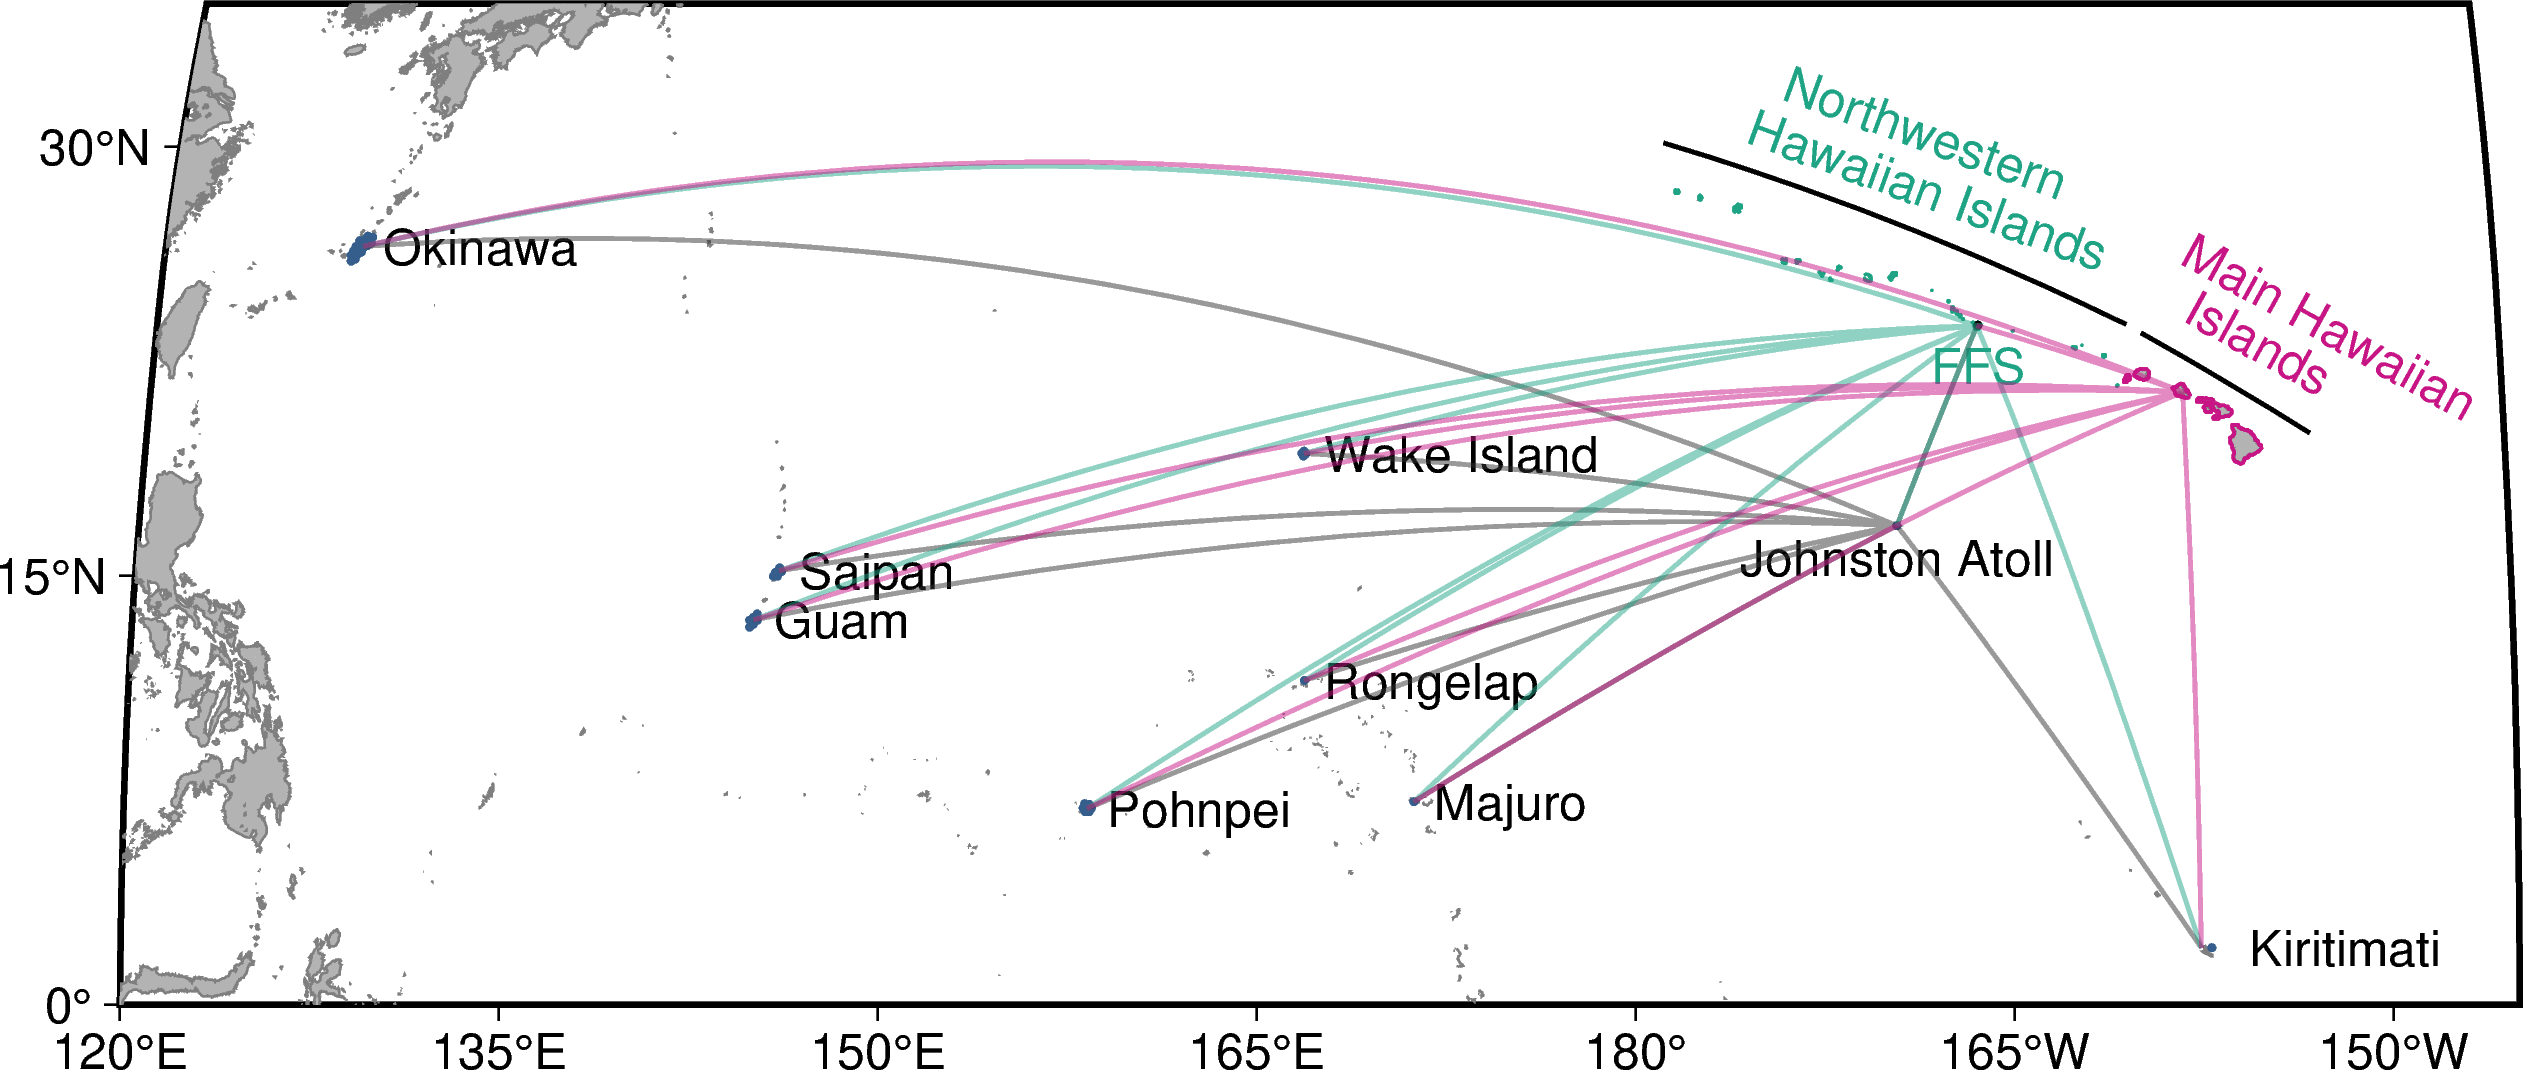

In [12]:
# Make the figure base figure. I went with a Robinson projection here
fig = pygmt.Figure()
with pygmt.config(MAP_FRAME_TYPE="plain", FONT_ANNOT_PRIMARY='12p'):
    fig.basemap(region=laps, projection='N180/8i', frame='a')
# Add coas lines and water color
#fig.coast(region=laps, water='#D3E9F1', d='c')     #D3E9F1 #E0EFF5
fig.coast(region=laps, land='gray70', shorelines="0.5p,gray50", d='c')
# Add blue circles for the RELEASE sites with name labels
fig.plot(x=sitesR.Lon, y=sitesR.Lat, style="c2p", color='#355e8c')
fig.text(text=sites.drop([10]).Name, x=sites.drop([10]).Lon+0.8, y=sites.drop([10]).Lat, justify='ML', font='12p')
## This one does Johnston separate becuse I wanted the label in a different place relative to the coordinate location
fig.text(text=sites.Name[10], x=sites.Lon[10], y=sites.Lat[10]-0.5, justify='TC', font='12p')
# Add green points for NWHI SETTLEMENT sites
fig.plot(x=sitesS[sitesS['Site'] <= 22].Lon, y=sitesS[sitesS['Site'] <= 22].Lat, style="c0.75p", color="#1fa385")
## Add point for French Frigate Shoals
fig.plot(x=FFS.Lon, y=FFS.Lat, style="c2p", color="black")
fig.text(text='FFS', x=FFS.Lon, y=FFS.Lat-0.75, justify='TC', font='12p,#1fa385')
# Add purple points for MHI SETTLEMENT sites
fig.plot(x=sitesS[sitesS['Site'] > 23].Lon, y=sitesS[sitesS['Site'] > 23].Lat, style="c0.75p", color="mediumvioletred")
# Add line and label for NWHI
fig.plot(x=[200.5, 207.16], y=[23.5, 20], pen='1p')
fig.text(text=['Northwestern', 'Hawaiian Islands'], x=[192, 192], y=[30.5, 28.5], justify='MC', angle=340, font='12p,#1fa385')
# Add line and label for MHI
fig.plot(x=[181.15, 199.9], y=[30.14, 23.8], pen='1p')
fig.text(text=['Main Hawaiian', 'Islands'], x=[202.5, 202.5], y=[26.5, 24.5], justify='ML', angle=331, font='12p,mediumvioletred')

# Add in the connections
fig.plot(data=islands.loc[[0,10,1,10,2,10,3,10,4,10,5,10,6,10,9,10, 11, 10],['Lon', 'Lat']], pen="1.0p,gray20", transparency=50)
fig.plot(data=islands.loc[[0,9,1,9,2,9,3,9,4,9,5,9,6,9,10,9,11,9],['Lon', 'Lat']], pen="1.0p,#1fa385", transparency=50)
fig.plot(data=islands.loc[[0,7,1,7,2,7,3,7,4,7,5,7,6,7,10,7,11,7,9,7],['Lon', 'Lat']], pen="1.0p,mediumvioletred", transparency=50)

# Finish up the plot
fig.set_panel()

# Show the figure below
fig.show()

# Save the figure
#fig.savefig('LAPS_study_area_withConnections.png')

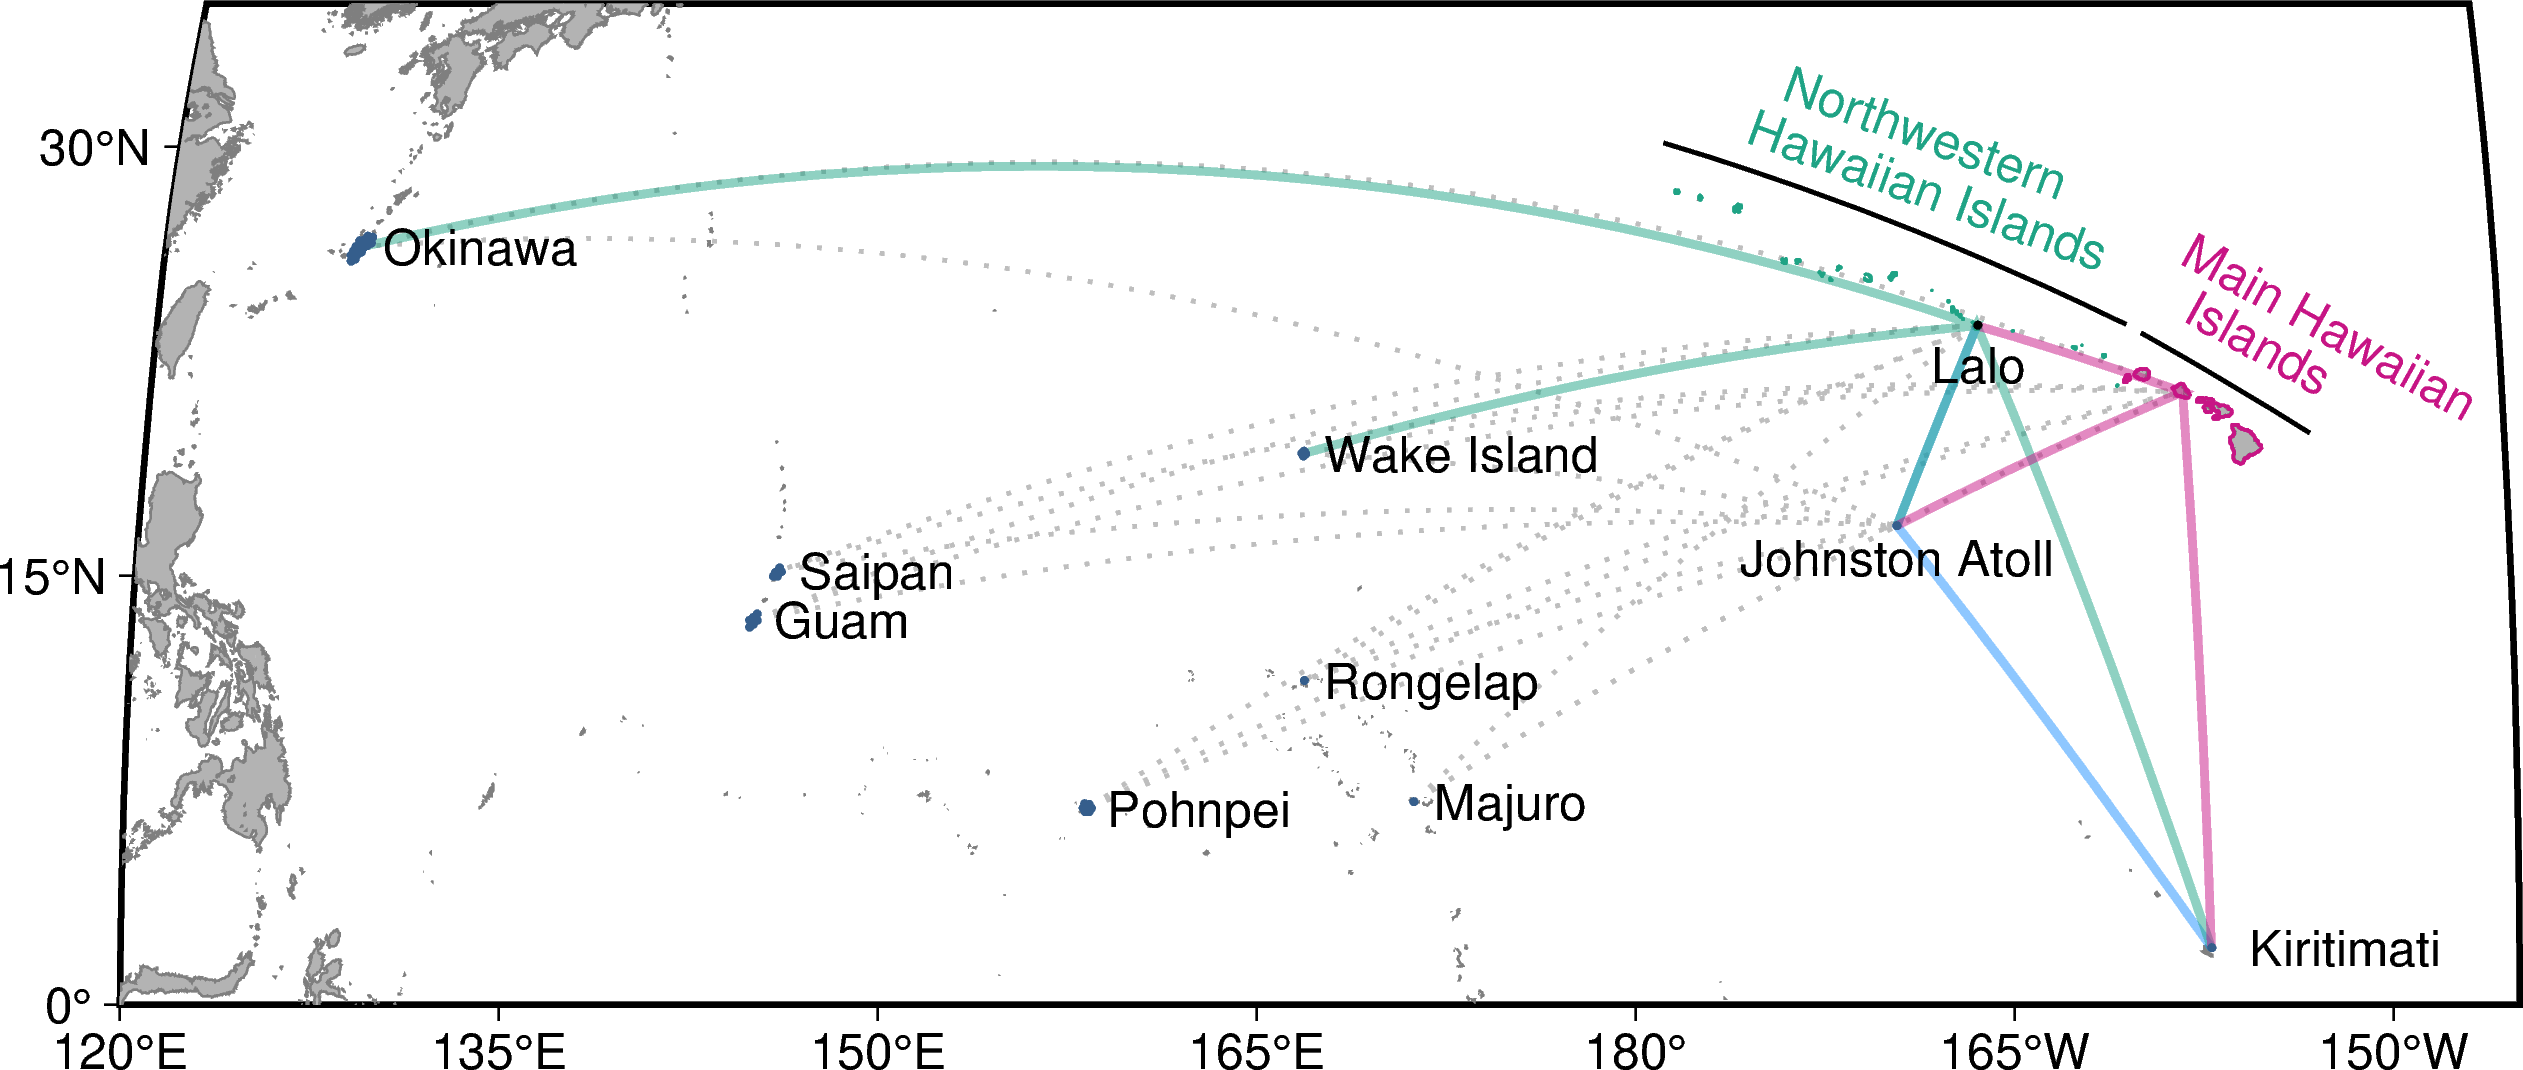

In [31]:
# Make the figure base figure. I went with a Robinson projection here
fig = pygmt.Figure()
with pygmt.config(MAP_FRAME_TYPE="plain", FONT_ANNOT_PRIMARY='12p'):
    fig.basemap(region=laps, projection='N180/8i', frame='a')
# Add coas lines and water color
#fig.coast(region=laps, water='#D3E9F1', d='c')     #D3E9F1 #E0EFF5
fig.coast(region=laps, land='gray70', shorelines="0.5p,gray50", d='c')

# Add in all possible connections
fig.plot(data=islands.loc[[0,10,1],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[2,10,3],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[5,10,6],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[11,10],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[0,9,1],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[2,9,3],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[5,9],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[0,7,1],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[2,7,3],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[5,7,6],['Lon', 'Lat']], pen="1.0p,gray,.")
fig.plot(data=islands.loc[[11,7],['Lon', 'Lat']], pen="1.0p,gray,.")

# Add in the actual connections
fig.plot(data=islands.loc[[9,10,10,10,4,10],['Lon', 'Lat']], pen="2p,dodgerblue", transparency=50)
fig.plot(data=islands.loc[[9,9,10,9,11,9,6,9,4,9],['Lon', 'Lat']], pen="2p,#1fa385", transparency=50)
fig.plot(data=islands.loc[[9,7,10,7,4,7],['Lon', 'Lat']], pen="2p,mediumvioletred", transparency=50)

# Add blue circles for the RELEASE sites with name labels
fig.plot(x=sitesR.Lon, y=sitesR.Lat, style="c2p", color='#355e8c')
fig.text(text=sites.drop([10]).Name, x=sites.drop([10]).Lon+0.8, y=sites.drop([10]).Lat, justify='ML', font='12p')
## This one does Johnston separate becuse I wanted the label in a different place relative to the coordinate location
fig.text(text=sites.Name[10], x=sites.Lon[10], y=sites.Lat[10]-0.5, justify='TC', font='12p')
# Add green points for NWHI SETTLEMENT sites
fig.plot(x=sitesS[sitesS['Site'] <= 22].Lon, y=sitesS[sitesS['Site'] <= 22].Lat, style="c0.75p", color="#1fa385")
## Add point for Lalo
fig.plot(x=FFS.Lon, y=FFS.Lat, style="c2p", color="black")
fig.text(text='Lalo', x=FFS.Lon, y=FFS.Lat-0.75, justify='TC', font='12p')
# Add purple points for MHI SETTLEMENT sites
fig.plot(x=sitesS[sitesS['Site'] > 23].Lon, y=sitesS[sitesS['Site'] > 23].Lat, style="c0.75p", color="mediumvioletred")
# Add line and label for NWHI
fig.plot(x=[200.5, 207.16], y=[23.5, 20], pen='1p')
fig.text(text=['Northwestern', 'Hawaiian Islands'], x=[192, 192], y=[30.5, 28.5], justify='MC', angle=340, font='12p,#1fa385')
# Add line and label for MHI
fig.plot(x=[181.15, 199.9], y=[30.14, 23.8], pen='1p')
fig.text(text=['Main Hawaiian', 'Islands'], x=[202.5, 202.5], y=[26.5, 24.5], justify='ML', angle=331, font='12p,mediumvioletred')

# Finish up the plot
fig.set_panel()

# Show the figure below
fig.show()

# Save the figure
fig.savefig('LAPS_study_area_wConnections_test.png')

# Multipanel plot

In [ ]:
fig = pygmt.Figure()

with fig.subplot(
    nrows=2,
    ncols=2,
    subsize=("8c"),
    frame = 'ag',
    sharey=True, 
    sharex=True,
    margins=["0.5c", "0.75c"],
    autolabel=True,
    frame="lrtb"
):
    with fig.set_panel(panel=0):
        